## EDA SONG LYRICS

### 01. Library Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import re
import string
from collections import Counter
import json
from datetime import datetime
warnings.filterwarnings('ignore')

# MLflow untuk tracking EDA
import mlflow
import mlflow.sklearn

# NLTK untuk text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# WordCloud
from wordcloud import WordCloud

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Setup MLflow
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("Mood_Classification_EDA")

# Setup visualisasi
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("✅ Setup EDA selesai")
print(f"✅ MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"✅ MLflow experiment: Mood_Classification_EDA")
print(f"✅ NLTK data downloaded")

✅ Setup EDA selesai
✅ MLflow tracking URI: file:./mlruns
✅ MLflow experiment: Mood_Classification_EDA
✅ NLTK data downloaded


### 02. Import Datasets

In [4]:
df = pd.read_excel('lyrics.xlsx')

print(f"\n📊 Informasi Dataset:")
print(f"   Total samples: {len(df)}")
print(f"   Kolom: {df.columns.tolist()}")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"\n🔍 5 Sample Pertama:")
df.head()


📊 Informasi Dataset:
   Total samples: 200
   Kolom: ['id', 'lyrics', 'mood', 'title', 'artist']
   Missing values: 0

🔍 5 Sample Pertama:


,id,lyrics,mood,title,artist
0,1,You know I don't believe in ghosts Or letting ...,angry,Living Hell,Bella Poarch
1,2,When I'm away from you I'm happier than ever W...,angry,Happier Than Ever,Billie Eilish
2,3,See it in my face That's the me I can't escape...,angry,Cry,Connor Kauffman
3,4,I don't wanna lie And you can't tell the truth...,angry,Crying While You're Dancing,Dayseeker
4,5,I don't wanna talk to you I don't wanna talk t...,angry,Quiet,eli


### 03. Data Cleaning

In [5]:
def clean_text_eda(text):
    if pd.isna(text):
        return ""
    
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus punctuation
    text = ' '.join(text.split())  # hapus whitespace berlebih
    return text

# Terapkan cleaning
df['lyrics_clean'] = df['lyrics'].apply(clean_text_eda)

# Tambah kolom analisis
df['char_count'] = df['lyrics_clean'].str.len()
df['word_count'] = df['lyrics_clean'].str.split().str.len()

print("✅ Data cleaning selesai")
print("\n📝 Contoh hasil cleaning:")
print("   Original:", df['lyrics'].iloc[0][:150], "...")
print("   Cleaned :", df['lyrics_clean'].iloc[0][:150], "...")
print(f"\n📊 Statistik awal:")
print(f"   Rata-rata jumlah kata: {df['word_count'].mean():.1f}")
print(f"   Min kata: {df['word_count'].min()}")
print(f"   Max kata: {df['word_count'].max()}")

✅ Data cleaning selesai

📝 Contoh hasil cleaning:
   Original: You know I don't believe in ghosts Or letting people close I'm good at letting go You kiss my lips until they're colder Think you're in control But I  ...
   Cleaned : you know i dont believe in ghosts or letting people close im good at letting go you kiss my lips until theyre colder think youre in control but i shou ...

📊 Statistik awal:
   Rata-rata jumlah kata: 308.2
   Min kata: 73
   Max kata: 686


### 04. Data Distribution

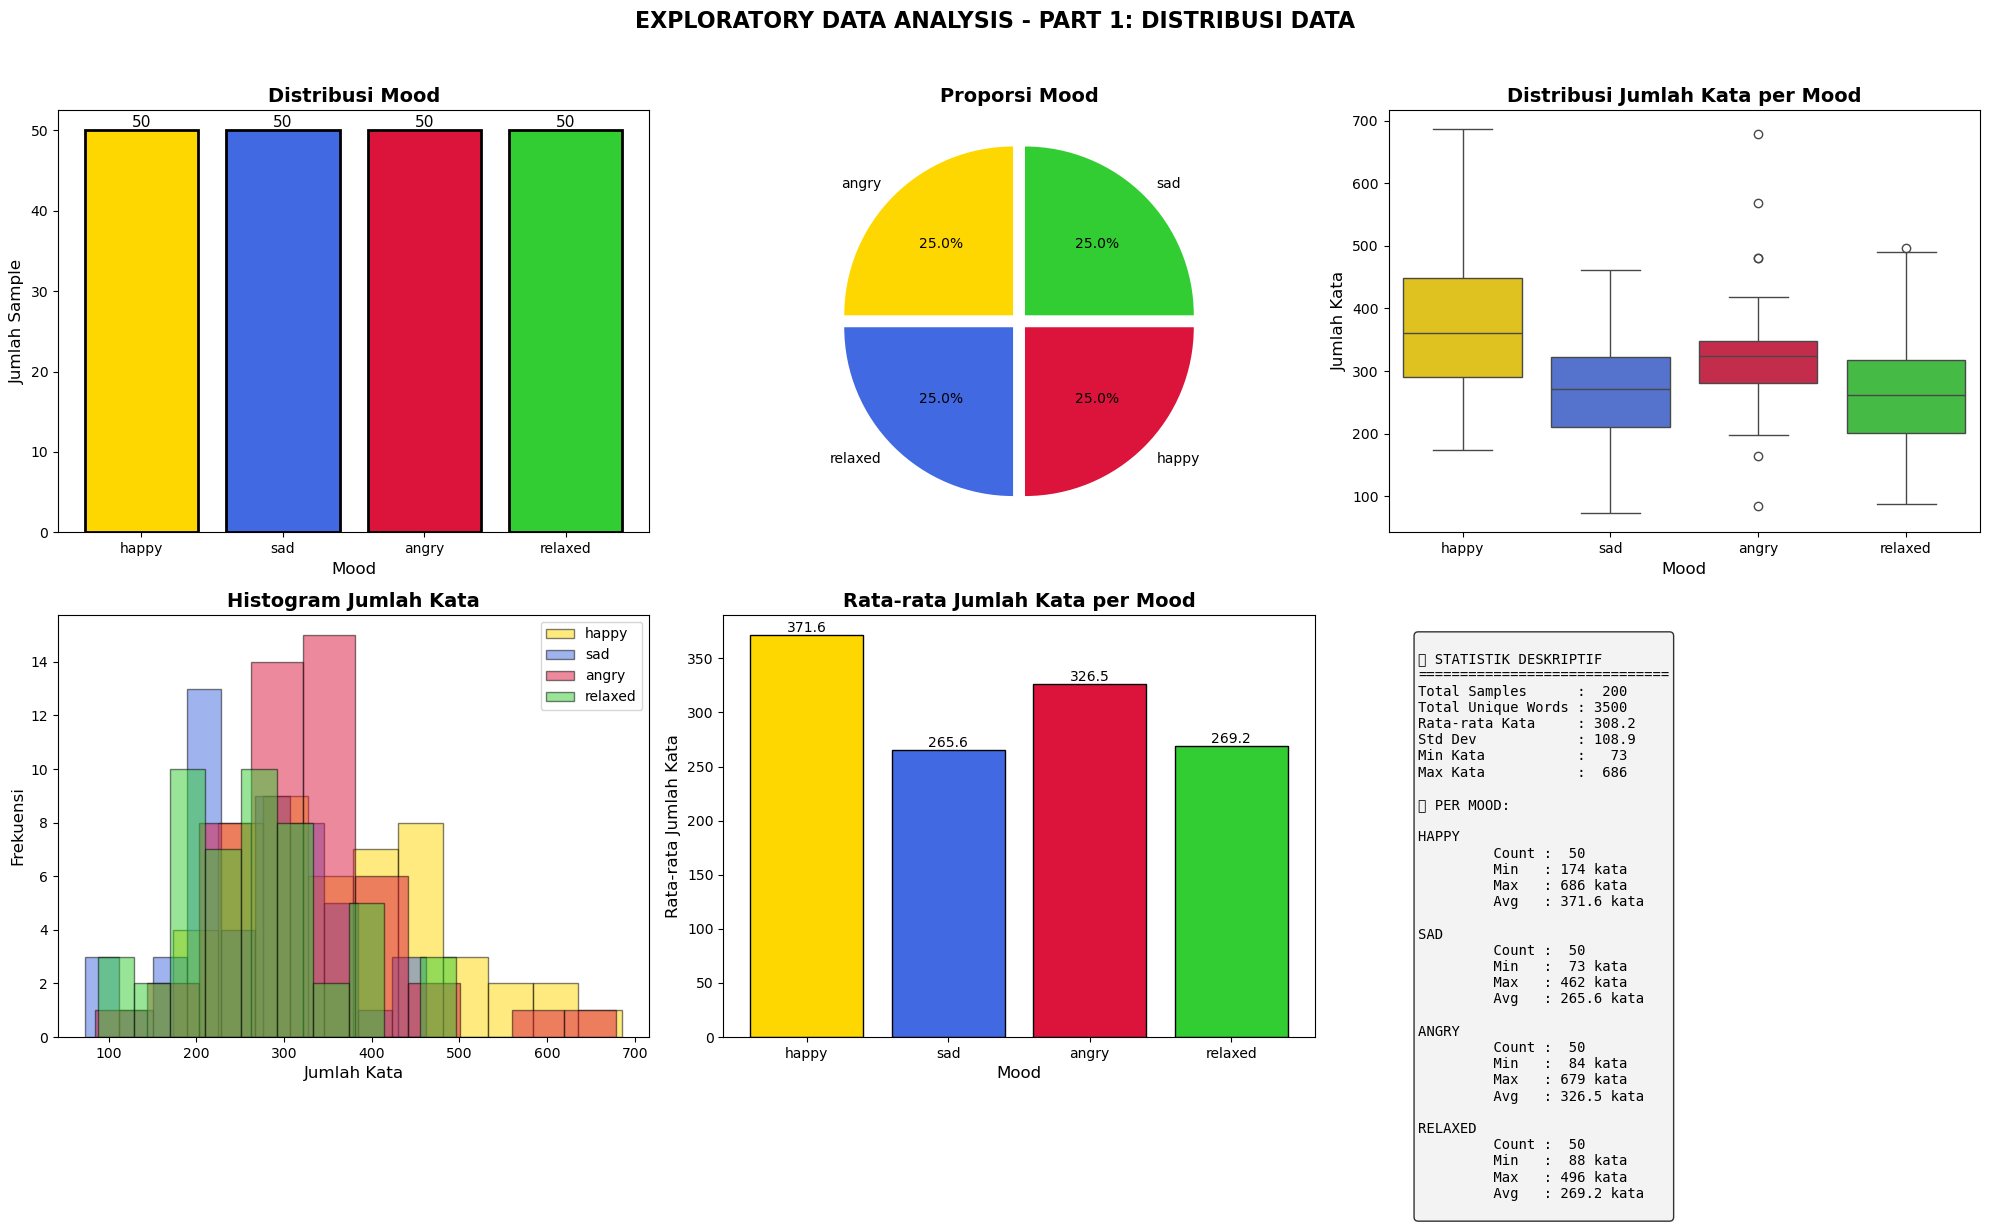

✅ EDA Part 1 selesai - Grafik distribusi tersimpan


In [6]:
# Setup stopwords untuk visualisasi
stop_words = set(stopwords.words('english'))
stop_words.update(['im', 'dont', 'youre', 'ive', 'ill', 'the', 'and', 'to', 'a', 
                   'oh', 'like', 'just', 'get', 'got', 'can', 'know', 'wan', 'na'])

# Setup figure
fig = plt.figure(figsize=(20, 12))

# 1. Distribusi Mood (Bar Chart)
plt.subplot(2, 3, 1)
mood_counts = df['mood'].value_counts()
mood_order = ['happy', 'sad', 'angry', 'relaxed']
colors = ['#FFD700', '#4169E1', '#DC143C', '#32CD32']  # kuning, biru, merah, hijau

bars = plt.bar(mood_order, [mood_counts.get(m, 0) for m in mood_order], 
               color=colors, edgecolor='black', linewidth=2)
plt.title('Distribusi Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Sample', fontsize=12)

# Tambah label nilai
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

# 2. Pie Chart Distribusi Mood
plt.subplot(2, 3, 2)
plt.pie(mood_counts.values, labels=mood_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05]*4)
plt.title('Proporsi Mood', fontsize=14, fontweight='bold')

# 3. Distribusi Panjang Lirik per Mood (Boxplot)
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='mood', y='word_count', order=mood_order, palette=colors)
plt.title('Distribusi Jumlah Kata per Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Jumlah Kata', fontsize=12)

# 4. Histogram Panjang Lirik
plt.subplot(2, 3, 4)
for i, mood in enumerate(mood_order):
    subset = df[df['mood'] == mood]
    plt.hist(subset['word_count'], alpha=0.5, label=mood, color=colors[i], bins=10, edgecolor='black')
plt.title('Histogram Jumlah Kata', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()

# 5. Rata-rata Jumlah Kata per Mood
plt.subplot(2, 3, 5)
mean_words = df.groupby('mood')['word_count'].mean().reindex(mood_order)
bars = plt.bar(mean_words.index, mean_words.values, color=colors, edgecolor='black')
plt.title('Rata-rata Jumlah Kata per Mood', fontsize=14, fontweight='bold')
plt.xlabel('Mood', fontsize=12)
plt.ylabel('Rata-rata Jumlah Kata', fontsize=12)

# Tambah label nilai
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# 6. Statistik Deskriptif
plt.subplot(2, 3, 6)
plt.axis('off')

# Hitung statistik tambahan
total_unique_words = len(set(' '.join(df['lyrics_clean']).split()))
stats_text = f"""
📊 STATISTIK DESKRIPTIF
{'='*30}
Total Samples      : {len(df):4d}
Total Unique Words : {total_unique_words:4d}
Rata-rata Kata     : {df['word_count'].mean():5.1f}
Std Dev            : {df['word_count'].std():5.1f}
Min Kata           : {df['word_count'].min():4d}
Max Kata           : {df['word_count'].max():4d}

📈 PER MOOD:
"""
for mood in mood_order:
    mood_df = df[df['mood'] == mood]
    stats_text += f"\n{mood.upper():8}"
    stats_text += f"\n{'':8} Count : {len(mood_df):3d}"
    stats_text += f"\n{'':8} Min   : {mood_df['word_count'].min():3d} kata"
    stats_text += f"\n{'':8} Max   : {mood_df['word_count'].max():3d} kata"
    stats_text += f"\n{'':8} Avg   : {mood_df['word_count'].mean():5.1f} kata\n"

plt.text(0.05, 0.95, stats_text, fontsize=10, verticalalignment='top',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='#f0f0f0', alpha=0.8))

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 1: DISTRIBUSI DATA', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part1_distribusi.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ EDA Part 1 selesai - Grafik distribusi tersimpan")

### 05. Word Cloud

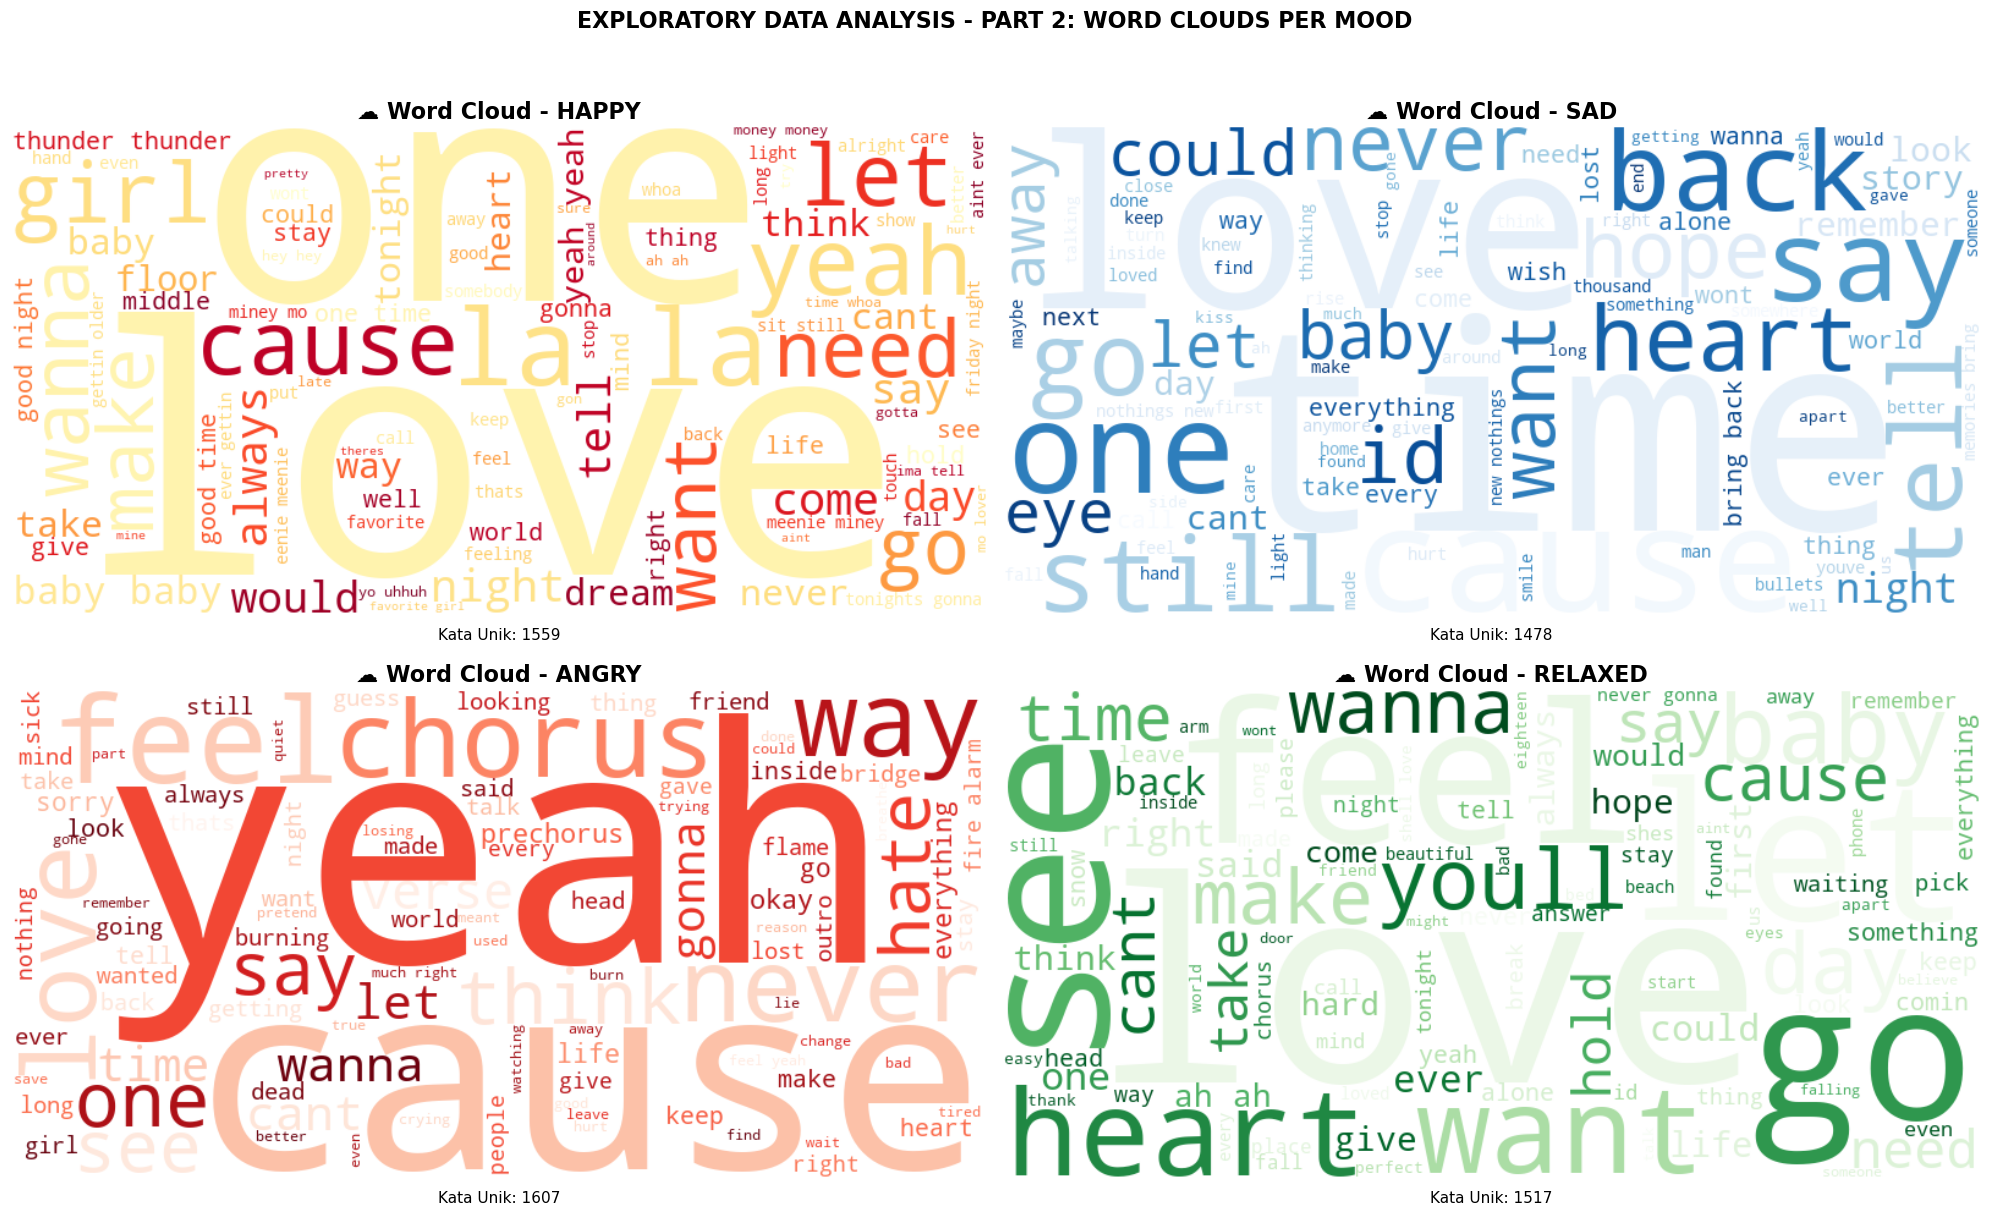

✅ EDA Part 2 selesai - Word clouds tersimpan


In [7]:
# Buat word cloud per mood
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
moods = ['happy', 'sad', 'angry', 'relaxed']
cloud_colors = {
    'happy': 'YlOrRd',
    'sad': 'Blues',
    'angry': 'Reds',
    'relaxed': 'Greens'
}

for idx, mood in enumerate(moods):
    row = idx // 2
    col = idx % 2
    
    # Gabungkan semua teks untuk mood tertentu
    mood_texts = df[df['mood'] == mood]['lyrics_clean']
    mood_text = ' '.join(mood_texts)
    
    # Buat word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap=cloud_colors[mood],
        max_words=100,
        stopwords=stop_words,
        contour_width=2,
        contour_color='black',
        random_state=42
    ).generate(mood_text)
    
    # Plot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f'☁️ Word Cloud - {mood.upper()}', fontsize=16, fontweight='bold')
    axes[row, col].axis('off')
    
    # Tambah info jumlah kata unik
    unique_words = len(set(mood_text.split()))
    axes[row, col].text(0.5, -0.05, f'Kata Unik: {unique_words}', 
                        transform=axes[row, col].transAxes, ha='center', fontsize=11)

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 2: WORD CLOUDS PER MOOD', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part2_wordclouds.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ EDA Part 2 selesai - Word clouds tersimpan")

### 06. The Most Words

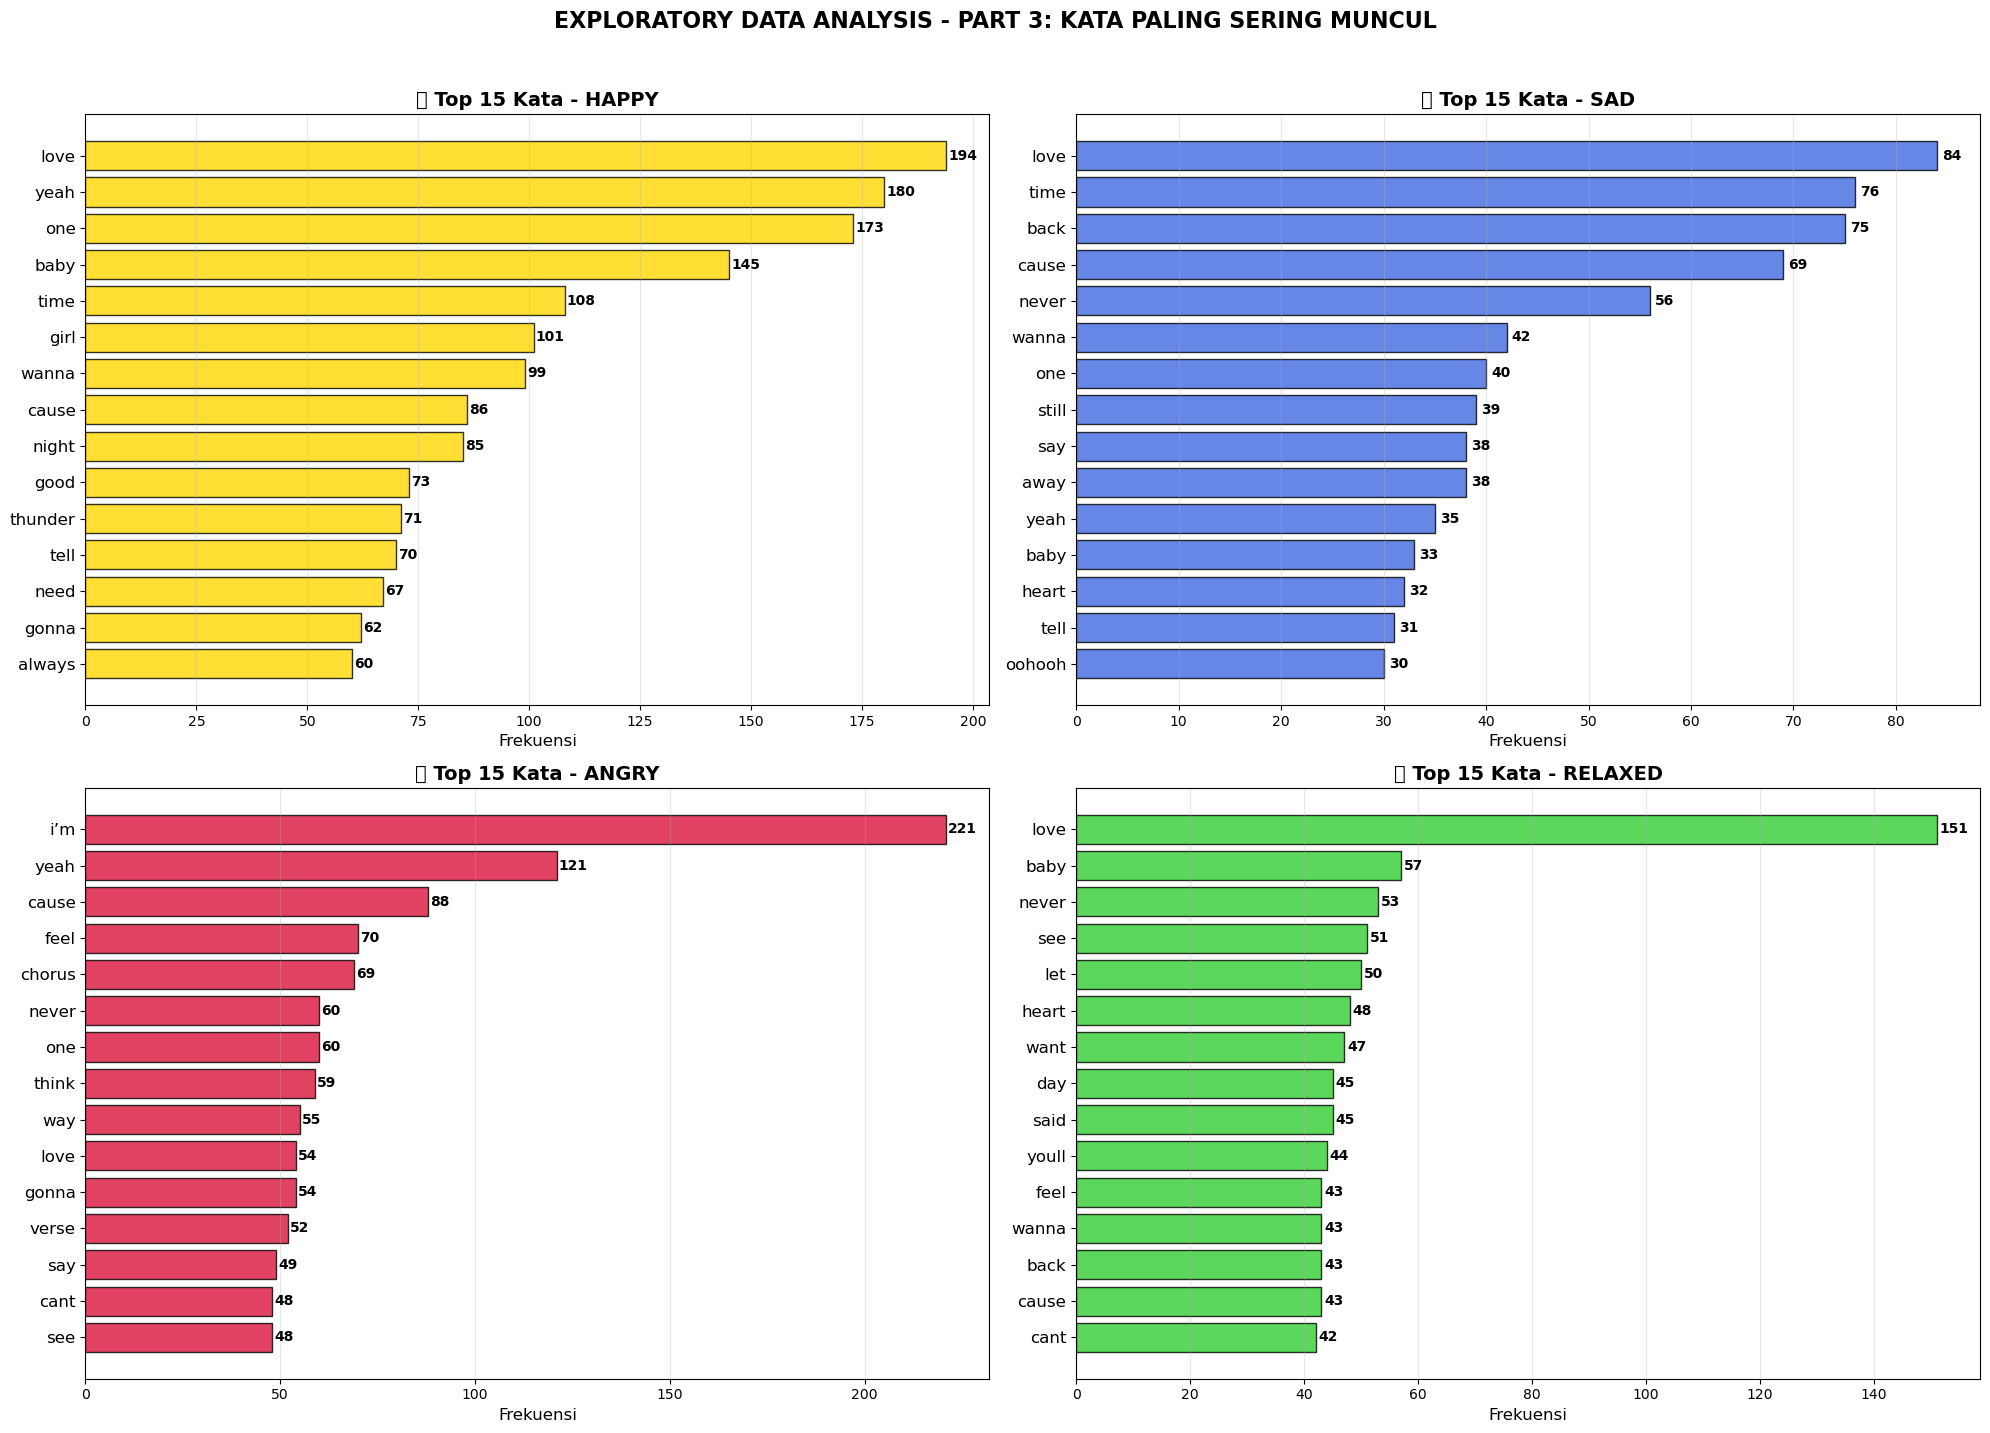


📊 RINGKASAN TOP 5 KATA PER MOOD:

HAPPY:
   • love: 194 kali
   • yeah: 180 kali
   • one: 173 kali
   • baby: 145 kali
   • time: 108 kali

SAD:
   • love: 84 kali
   • time: 76 kali
   • back: 75 kali
   • cause: 69 kali
   • never: 56 kali

ANGRY:
   • i’m: 221 kali
   • yeah: 121 kali
   • cause: 88 kali
   • feel: 70 kali
   • chorus: 69 kali

RELAXED:
   • love: 151 kali
   • baby: 57 kali
   • never: 53 kali
   • see: 51 kali
   • let: 50 kali

✅ EDA Part 3 selesai


In [8]:
def get_top_words(texts, n=15, min_length=3):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    
    # Filter stopwords dan kata pendek
    filtered_counts = {}
    for word, count in word_counts.items():
        if word not in stop_words and len(word) >= min_length:
            filtered_counts[word] = count
    
    # Sort by count descending
    sorted_words = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

# Plot top words per mood
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

for idx, mood in enumerate(moods):
    row = idx // 2
    col = idx % 2
    
    mood_texts = df[df['mood'] == mood]['lyrics_clean']
    top_words = get_top_words(mood_texts, n=15)
    
    if top_words:
        words, counts = zip(*top_words)
        
        # Horizontal bar chart
        y_pos = range(len(words))
        axes[row, col].barh(y_pos, counts, color=colors[idx], alpha=0.8, edgecolor='black')
        axes[row, col].set_yticks(y_pos)
        axes[row, col].set_yticklabels(words, fontsize=12)
        axes[row, col].invert_yaxis()
        axes[row, col].set_xlabel('Frekuensi', fontsize=12)
        axes[row, col].set_title(f'🔤 Top 15 Kata - {mood.upper()}', fontsize=14, fontweight='bold')
        
        # Tambah grid
        axes[row, col].grid(axis='x', alpha=0.3)
        
        # Tambah label nilai
        for i, (word, count) in enumerate(top_words):
            axes[row, col].text(count + 0.5, i, str(count), va='center', fontsize=10, fontweight='bold')
    else:
        axes[row, col].text(0.5, 0.5, 'Tidak ada data', ha='center', va='center', fontsize=14)
        axes[row, col].set_title(f'Top 15 Kata - {mood.upper()}', fontsize=14, fontweight='bold')

plt.suptitle('EXPLORATORY DATA ANALYSIS - PART 3: KATA PALING SERING MUNCUL', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('eda_part3_top_words.png', dpi=150, bbox_inches='tight')
plt.show()

# Tabel ringkasan top words
print("\n📊 RINGKASAN TOP 5 KATA PER MOOD:")
print("="*50)

for mood in moods:
    mood_texts = df[df['mood'] == mood]['lyrics_clean']
    top_words = get_top_words(mood_texts, n=5)
    
    print(f"\n{mood.upper()}:")
    for word, count in top_words:
        print(f"   • {word}: {count} kali")

print("\n✅ EDA Part 3 selesai")

### 07. Summary

In [9]:
# Hitung metrik EDA
eda_metrics = {
    'total_samples': len(df),
    'total_unique_words': len(set(' '.join(df['lyrics_clean']).split())),
    'avg_words_per_lyric': float(df['word_count'].mean()),
    'std_words_per_lyric': float(df['word_count'].std()),
    'min_words': int(df['word_count'].min()),
    'max_words': int(df['word_count'].max()),
    'class_distribution': df['mood'].value_counts().to_dict(),
    'class_imbalance_ratio': float(df['mood'].value_counts().max() / df['mood'].value_counts().min())
}

# Hitung statistik per mood
mood_stats = {}
for mood in moods:
    mood_df = df[df['mood'] == mood]
    mood_stats[mood] = {
        'count': len(mood_df),
        'avg_words': float(mood_df['word_count'].mean()),
        'std_words': float(mood_df['word_count'].std()),
        'min_words': int(mood_df['word_count'].min()),
        'max_words': int(mood_df['word_count'].max()),
        'total_unique_words': len(set(' '.join(mood_df['lyrics_clean']).split()))
    }

# Simpan ke MLflow
with mlflow.start_run(run_name="EDA_Analysis"):
    # Log metrics
    mlflow.log_metrics({
        'total_samples': eda_metrics['total_samples'],
        'total_unique_words': eda_metrics['total_unique_words'],
        'avg_words_per_lyric': eda_metrics['avg_words_per_lyric'],
        'std_words_per_lyric': eda_metrics['std_words_per_lyric'],
        'min_words': eda_metrics['min_words'],
        'max_words': eda_metrics['max_words'],
        'class_imbalance_ratio': eda_metrics['class_imbalance_ratio']
    })
    
    # Log params (class distribution)
    for mood, count in eda_metrics['class_distribution'].items():
        mlflow.log_param(f"count_{mood}", count)
    
    # Log artifacts
    mlflow.log_artifact('eda_part1_distribusi.png')
    mlflow.log_artifact('eda_part2_wordclouds.png')
    mlflow.log_artifact('eda_part3_top_words.png')
    
    # Simpan stats ke file JSON
    summary = {
        'eda_metrics': eda_metrics,
        'mood_stats': mood_stats,
        'timestamp': datetime.now().isoformat(),
        'dataset_info': {
            'columns': list(df.columns),
            'shape': list(df.shape),
            'missing_values': int(df.isnull().sum().sum())
        }
    }
    
    with open('eda_summary.json', 'w') as f:
        json.dump(summary, f, indent=2)
    
    mlflow.log_artifact('eda_summary.json')

# Tampilkan ringkasan
print("\n" + "="*60)
print("📋 RINGKASAN EDA")
print("="*60)

print(f"\n📊 Statistik Dataset:")
print(f"   Total Samples       : {eda_metrics['total_samples']:4d}")
print(f"   Total Unique Words  : {eda_metrics['total_unique_words']:4d}")
print(f"   Rata-rata Kata      : {eda_metrics['avg_words_per_lyric']:.1f} (±{eda_metrics['std_words_per_lyric']:.1f})")
print(f"   Min Kata            : {eda_metrics['min_words']:4d}")
print(f"   Max Kata            : {eda_metrics['max_words']:4d}")
print(f"   Class Imbalance Ratio: {eda_metrics['class_imbalance_ratio']:.2f}")

print(f"\n📈 Distribusi Mood:")
for mood, count in eda_metrics['class_distribution'].items():
    pct = (count/eda_metrics['total_samples'])*100
    bar = '█' * int(pct/2)
    print(f"   {mood:8}: {count:3d} samples ({pct:5.1f}%) {bar}")

print(f"\n📊 Statistik per Mood:")
for mood, stats in mood_stats.items():
    print(f"\n   {mood.upper()}:")
    print(f"      Jumlah sample    : {stats['count']:3d}")
    print(f"      Rata-rata kata   : {stats['avg_words']:.1f} kata")
    print(f"      Kata unik        : {stats['total_unique_words']:4d}")
    print(f"      Range kata       : {stats['min_words']} - {stats['max_words']} kata")

print("\n✅ EDA selesai!")
print("📁 File yang tersimpan:")
print("   • eda_part1_distribusi.png")
print("   • eda_part2_wordclouds.png")
print("   • eda_part3_top_words.png")
print("   • eda_summary.json")
print("   • processed_lyrics.csv")
print(f"\n📊 MLflow run tersimpan di: {mlflow.get_tracking_uri()}")
print("   Untuk melihat hasil MLflow: mlflow ui")


📋 RINGKASAN EDA

📊 Statistik Dataset:
   Total Samples       :  200
   Total Unique Words  : 3500
   Rata-rata Kata      : 308.2 (±108.9)
   Min Kata            :   73
   Max Kata            :  686
   Class Imbalance Ratio: 1.00

📈 Distribusi Mood:
   angry   :  50 samples ( 25.0%) ████████████
   relaxed :  50 samples ( 25.0%) ████████████
   happy   :  50 samples ( 25.0%) ████████████
   sad     :  50 samples ( 25.0%) ████████████

📊 Statistik per Mood:

   HAPPY:
      Jumlah sample    :  50
      Rata-rata kata   : 371.6 kata
      Kata unik        : 1559
      Range kata       : 174 - 686 kata

   SAD:
      Jumlah sample    :  50
      Rata-rata kata   : 265.6 kata
      Kata unik        : 1478
      Range kata       : 73 - 462 kata

   ANGRY:
      Jumlah sample    :  50
      Rata-rata kata   : 326.5 kata
      Kata unik        : 1607
      Range kata       : 84 - 679 kata

   RELAXED:
      Jumlah sample    :  50
      Rata-rata kata   : 269.2 kata
      Kata unik        : 15

### 08. Save Processed Data

In [10]:
# Simpan dataframe yang sudah diproses
df.to_csv('processed_lyrics.csv', index=False)

print("✅ Data processed disimpan ke 'processed_lyrics.csv'")
print(f"   Shape: {df.shape}")
print(f"   Kolom: {list(df.columns)}")

# Preview data yang akan digunakan untuk modelling
print("\n🔍 Preview data untuk modelling:")
preview_cols = ['lyrics', 'lyrics_clean', 'mood', 'word_count']
print(df[preview_cols].head(3).to_string())

# Info tambahan untuk modelling
print("\n📌 Catatan untuk Modelling:")
print("   1. Gunakan kolom 'lyrics_clean' untuk feature extraction")
print("   2. Kolom 'mood' sebagai target variable")
print("   3. Statistik tambahan bisa digunakan untuk analisis lebih lanjut")

✅ Data processed disimpan ke 'processed_lyrics.csv'
   Shape: (200, 8)
   Kolom: ['id', 'lyrics', 'mood', 'title', 'artist', 'lyrics_clean', 'char_count', 'word_count']

🔍 Preview data untuk modelling:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              